In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.ensemble import RandomForestClassifier

In [2]:
df= pd.read_csv("C:\\Users\\vinay\\OneDrive\\Desktop\\Naresh DS\\Datasets\\news.csv")

In [3]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [5]:
df = df.drop(columns = "Unnamed: 0")
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [6]:
df.shape

(6335, 3)

In [8]:
df["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

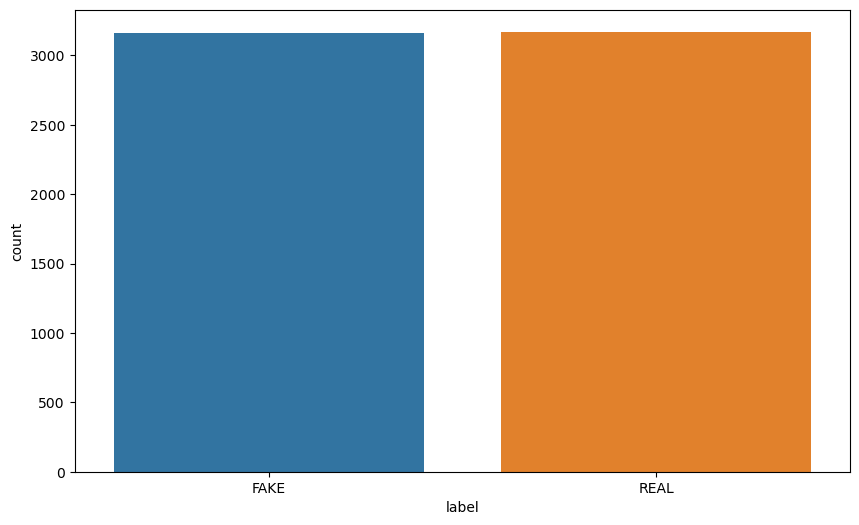

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(df["label"])
plt.show()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words ="english", max_features = 1000)
vect

CountVectorizer(max_features=1000, stop_words='english')

In [21]:
x=df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x1 = vect.fit_transform(x[:,0]).todense()
x2 = vect.fit_transform(x[:,1]).todense()
X = np.hstack((x1,x2))

In [23]:
X.shape

(6335, 2000)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1000)

In [27]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
y_predict = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy= accuracy_score(y_predict,y_test)
matrix = confusion_matrix(y_predict,y_test)

In [37]:
print("The accuracy is : ",accuracy)
print("thge matrix:", matrix)

The accuracy is :  0.8996212121212122
thge matrix: [[693  71]
 [ 88 732]]
